# Prophet

Developed by Facebook. It needs data which has column names "ds" stands for date and "y" for target variable. It works for time-series data which is non-linear.
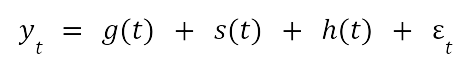

In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
df = pd.read_csv('cap5.csv')
df.drop(["cycle","ambient_temperature"],inplace=True,axis = 1)

In [3]:
df.rename(columns = {'datetime':'ds',"capacity" : "y"}, inplace = True)

In [4]:
m = Prophet()
m.fit(df)

15:40:35 - cmdstanpy - INFO - Chain [1] start processing
15:40:35 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
future = m.make_future_dataframe(periods=5)

In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
168,2008-05-28 20:45:42,1.272335,1.257529,1.286841
169,2008-05-29 20:45:42,1.267135,1.250428,1.284565
170,2008-05-30 20:45:42,1.269766,1.250216,1.288881
171,2008-05-31 20:45:42,1.249602,1.224334,1.274605
172,2008-06-01 20:45:42,1.236613,1.205906,1.265770


In [7]:
import seaborn as sns
forecast.rename(columns = {"yhat" : "y"}, inplace = True)


In [8]:
forecast = forecast[["ds","y"]]

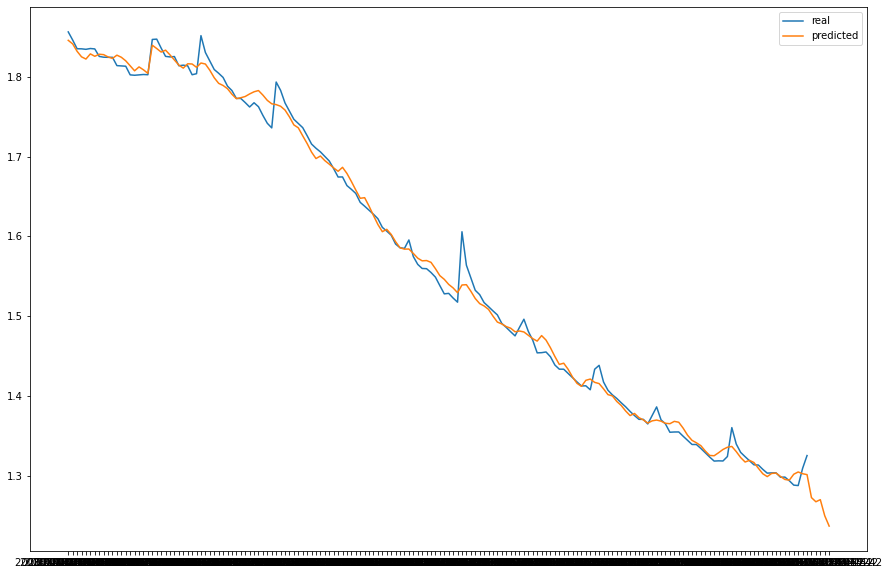

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(df["ds"],df["y"])
forecast["ds"] = forecast["ds"].astype(str)
plt.plot(forecast["ds"],forecast["y"])
plt.legend(["real","predicted"])